In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import warnings
warnings.filterwarnings('ignore')

In [2]:
d = pd.read_csv(r'C:\Users\ACrist\Documents\tryout\beer_reviews\beer_reviews.csv')

In [3]:
# It's an exciting prospect to work for Guilford County. I believe in local government, and I think
# that data science is a necessary tool for good governance.

# I chose to submit answers via a jupyter notebook written in python. Python is the industry standard
# for data science and much better suited to building out applications, reporting tools, and conducting 
# analysis than R.

In [4]:
# Question 1
# Answering this question was relatively straightforward. First, I filtered out all beers with no
# ABV information. Then, since the question is asking which brewery produces the most beers, plural,
# I only consider breweries producing at least 2 beers--there were several breweries producing only
# one beer that ended up in the top 10 abv if I did not filter them out.
# Then by grouping on breweries and beers for that brewery, I produced two measures of
# "average" abv--mean and median. However, for both the answer remains the same and by a 
# wide margin: Schorschbräu. See graphs below.

In [5]:
dd = d[~d['beer_abv'].isnull()]

In [6]:
ddd = dd.groupby(['brewery_name']).agg({'beer_name': 'nunique'})

In [7]:
ddd = ddd[ddd['beer_name']>1]

In [8]:
dindex = list(ddd.index)

dd = dd[dd['brewery_name'].isin(dindex)]

In [9]:
temp = dd.groupby(['brewery_name', 'beer_name']).agg({'beer_abv': 'last'})

In [10]:
abv = temp.groupby('brewery_name').agg({'beer_abv': ['mean', 'median']})

In [11]:
abv.columns = abv.columns.droplevel()

In [12]:
abv.reset_index(inplace=True)

In [13]:
mean = abv.nlargest(10, 'mean')
median = abv.nlargest(10, 'median')

In [16]:
mean

,brewery_name,mean,median
3343,Schorschbräu,24.690000,16.00
3233,Rome Brewing Company,14.200000,14.20
2042,Hurlimann Brewery,13.500000,14.00
2649,Monks Porter House,12.466667,11.00
3197,Rinkuki&#371; Aluas Darykla,12.000000,12.00
3440,Snowy Mountain Brewery,12.000000,12.00
1539,Etna Brewery,11.500000,11.50
2718,Nasu Kogen Beer Co. Ltd.,11.500000,11.50
3518,Steam Plant Grill,11.066667,10.20
598,Brasserie Dubuisson Frères sprl,10.607143,11.25


In [17]:
median

,brewery_name,mean,median
3343,Schorschbräu,24.690000,16.00
3233,Rome Brewing Company,14.200000,14.20
2042,Hurlimann Brewery,13.500000,14.00
3197,Rinkuki&#371; Aluas Darykla,12.000000,12.00
3440,Snowy Mountain Brewery,12.000000,12.00
1539,Etna Brewery,11.500000,11.50
2718,Nasu Kogen Beer Co. Ltd.,11.500000,11.50
598,Brasserie Dubuisson Frères sprl,10.607143,11.25
67,AleSmith Brewing Company,10.165769,11.00
2649,Monks Porter House,12.466667,11.00


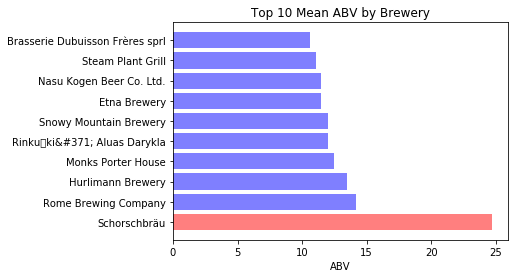

In [14]:
breweries = list(mean['brewery_name'])
y_pos = np.arange(len(breweries))
x = list(mean['mean'])

plt.barh(y_pos, x, align='center', alpha=0.5, color='rbbbbbbbbb')
plt.yticks(y_pos, breweries)
plt.xlabel('ABV')
plt.title('Top 10 Mean ABV by Brewery')

plt.show()
# plt.savefig(r'C:\Users\ACrist\Documents\tryout\meanABVbyBrewery.png')

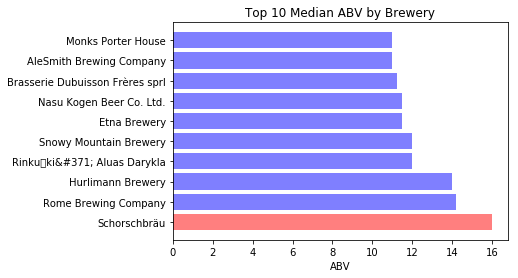

In [15]:
breweries = list(median['brewery_name'])
y_pos = np.arange(len(breweries))
x = list(median['median'])

plt.barh(y_pos, x, align='center', alpha=0.5, color='rbbbbbbbbb')
plt.yticks(y_pos, breweries)
plt.xlabel('ABV')
plt.title('Top 10 Median ABV by Brewery')

plt.show()
# plt.savefig(r'C:\Users\ACrist\Documents\tryout\medianABVbyBrewery.png')

In [18]:
# Question 2
# This question was vague enough that I saw several possibilities by which I could recommend beers
# based on personal preferences. The formulation of the problem is such that two approaches seemed
# best suited--both of which are of a category of recommenders called "Collaborative Recommender
# Systems". One of which is a simple similarity system which uses correlation coefficients--which 
# achieved very believable results based on my personal preferences--and the other is a more 
# computationally intensive method called "Matrix Factorization"  that also achieved good results.

In [19]:
# 2a. similarity based recommender system

In [118]:
# I would like to filter out reviewers who have fewer than some number of reviews. Here, 200
tt = d.groupby(['beer_name']).agg({'review_profilename': 'count'})
tt = tt[tt['review_profilename']>= 200]

# I would also like to filter out reviewers with fewer than 100 reviews. 
t = d.groupby('review_profilename').agg({'beer_name':'count'})
t = t[t['beer_name'] > 100]

tindex = list(t.index)
ttindex = list(tt.index)
dd = d[(d['beer_name'].isin(ttindex)) & (d['review_profilename'].isin(tindex))]

In [119]:
# Because there is no necessary relationship between review_overall and the various categories,
# sum the individual categories to obtain an overall measure of the beer
dd['TOTAL'] = dd['review_aroma'] + dd['review_appearance'] + dd['review_palate'] + dd['review_taste']

In [120]:
r = dd[['beer_beerid', 'review_profilename', 'TOTAL']]

In [121]:
# My favorite beer! Unfortunately, it is very difficult to find in North Carolina.
d[d['beer_name'].str.contains('Odell IPA')]['beer_beerid'].iloc[0]

35626

In [122]:
r_pivot = r.pivot_table(index=['review_profilename'], columns=['beer_beerid'], values='TOTAL')

In [123]:
similar = r_pivot.corrwith(r_pivot[35626])

In [124]:
similar = pd.DataFrame(similar.dropna())

In [125]:
# There are 44 beers with perfect correlation with the beer for which I would like to find a similar beer
# In order to recommend just 3 beers, I will filter out some beers with fewer reviews.
len(similar[similar[0]==1])

44

In [126]:
filt = r.groupby('beer_beerid').agg({'TOTAL': ['count', 'mean']})

In [128]:
filtered = filt[most_reviewed_beers].join(pd.DataFrame(similar, columns=[0]))

In [129]:
filtered.sort_values(0, ascending=False)

,"(TOTAL, count)","(TOTAL, mean)",0
beer_beerid,,,
35626,327,16.533639,1.000000
38101,86,16.308140,0.719780
11565,75,15.106667,0.666956
17443,77,16.928571,0.589737
59214,184,16.176630,0.562127
57341,190,14.160526,0.545938
2945,226,11.431416,0.540469
4904,286,14.877622,0.538725
62397,182,18.189560,0.530679


In [ ]:
# The first two values I used to filter out beers and reviewers with few reviews actually gave me
# some very funny (and unsurprising) results. When I drink beer, I only ever drink IPAs, and
# Odell's IPA is very much an IPA's IPA. The top three beers most correlated with Odell's IPA 
# based on review categories were:
# 1. Imperial IPA, beer_beerid: 38101
# 2. IPA, beer_beerid: 11565
# 3. India Pale Ale, beer_beerid: 17443

# Coincidence? I think not. Very funny. Am I pigionholing myself? Maybe I should try another 
# style of beer...

In [ ]:
# 2b. Matrix Factorization

In [ ]:
# Because there are 66055 unique beers and 33387 unique reviewers, a pivot table with reviewers as an
# index and beer names as columns will be extremely sparse as well as very large. I paired down these
# values such that the model only considers reviewers with more than 600 reviews and beers with
# more than 400 reviews.

In [451]:
tt = d.groupby(['beer_name']).agg({'review_profilename': 'count'})
tt = tt[tt['review_profilename']>= 600]

t = d.groupby('review_profilename').agg({'beer_name':'count'})
t = t[t['beer_name'] > 400]

tindex = list(t.index)
ttindex = list(tt.index)
dd = d[(d['beer_name'].isin(ttindex)) & (d['review_profilename'].isin(tindex))]

In [453]:
beer_matrix = dd.pivot_table(index='review_profilename', columns='beer_name', values='review_overall', fill_value=0)

In [546]:
# As I read through the list of beers I add values in a similar manner as the line below 
beer_matrix.loc['Me', 'Sierra Nevada Pale Ale',] = 3.8

# I rated the following beers:
# Arrogant Bastard Ale                                       3.7
# Corona Extra                                               2.3
# Franziskaner Hefe-Weisse                                   3.5
# Franziskaner Hefe-Weisse Dunkel                            3.9
# Guinness Draught                                           2.1
# Jai Alai IPA                                               3.4
# Lagunitas IPA                                              4.1
# Sierra Nevada Torpedo Extra IPA                            4.3
# Bud Light                                                  0.3
# Budweiser                                                  2.1
# Fat Tire Amber Ale                                         3.8
# Sierra Nevada Pale Ale                                     3.8

In [547]:
R = np.array(beer_matrix.values)

In [548]:
from sklearn.decomposition import NMF

In [549]:
nmf = NMF()
W = nmf.fit_transform(R)

In [550]:
H = nmf.components_
nR = np.dot(W,H)
nR

array([[4.00988376e+00, 1.29239255e-03, 4.50054449e+00, ...,
        8.53855980e-02, 0.00000000e+00, 3.50069815e+00],
       [1.30049116e-05, 5.32414245e-02, 1.11867417e-02, ...,
        0.00000000e+00, 0.00000000e+00, 3.50012531e+00],
       [5.53061825e-03, 3.49571035e+00, 7.92244452e-03, ...,
        3.88091947e-03, 4.00084556e+00, 0.00000000e+00],
       ...,
       [3.50688531e+00, 4.03041181e+00, 4.50282455e+00, ...,
        3.50400243e+00, 6.10085174e-04, 3.49903997e+00],
       [7.81197722e-06, 3.52243122e+00, 6.44434693e-03, ...,
        0.00000000e+00, 4.50004019e+00, 0.00000000e+00],
       [4.61929091e-02, 4.31490174e-04, 6.42833992e-03, ...,
        4.00004089e-03, 0.00000000e+00, 0.00000000e+00]])

In [551]:
tindex.append('Me')

In [553]:
matrixFactorization = pd.DataFrame(nR, index=tindex, columns=ttindex)

In [554]:
matrixFactorization

,#9,120 Minute IPA,1554 Enlightened Black Ale,21st Amendment IPA,2XIPA,30th Anniversary - Fritz And Ken's Ale,312 Urban Wheat,471 IPA,60 Minute IPA,90 Minute IPA,...,World Wide Stout,XS Imperial India Pale Ale,XS Old Crustacean,Yakima Glory,Yeti Imperial Stout,Young's Double Chocolate Stout,Yuengling Black & Tan,Yuengling Traditional Lager,YuleSmith (Summer),Éphémère (Apple)
ADR,4.009884e+00,1.292393e-03,4.500544,1.673535e-02,7.520291e-03,0.000000e+00,5.166526e-02,3.902011e-02,3.484304,3.967682,...,3.999663e+00,4.499871e+00,3.997705,5.168516e-02,4.005041e+00,4.499690e+00,2.710790e-02,8.538560e-02,0.000000,3.500698e+00
ADZA,1.300491e-05,5.324142e-02,0.011187,5.128851e-03,3.513756e+00,6.733206e-02,7.371155e-03,1.254089e-02,4.469972,3.515839,...,1.395062e-04,4.499873e+00,0.000000,1.057211e-01,3.974708e+00,4.004641e+00,1.082462e-05,0.000000e+00,0.000000,3.500125e+00
AKBelgianBeast,5.530618e-03,3.495710e+00,0.007922,4.496417e+00,0.000000e+00,7.701268e-03,1.392648e-02,1.010969e-03,3.983252,4.577030,...,4.498020e+00,5.980659e-03,4.001696,2.592712e-04,4.001258e+00,4.497734e+00,5.273954e-07,3.880919e-03,4.000846,0.000000e+00
ALESwhatCURESya,0.000000e+00,4.427838e-02,4.502193,3.618976e-03,2.747512e-03,2.323661e-02,0.000000e+00,5.426582e-03,0.778505,3.754577,...,3.998608e+00,4.951920e-03,3.994324,4.288276e-02,3.947326e-03,4.002456e+00,1.644561e-02,3.041936e-03,0.000010,2.999667e+00
ATLbeerDog,6.258650e-02,1.625029e-01,0.000000,2.294571e-09,0.000000e+00,0.000000e+00,3.861778e-02,0.000000e+00,0.008988,1.896201,...,2.827237e-03,3.999767e+00,0.013407,0.000000e+00,4.486244e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00
ATPete,0.000000e+00,1.252112e-02,3.998730,1.025152e-04,1.610827e-03,7.194479e-02,0.000000e+00,4.103080e-02,2.520332,1.591657,...,1.582507e-06,3.738947e-03,0.010634,4.146979e+00,3.610146e-02,3.718074e-04,0.000000e+00,0.000000e+00,0.000000,3.000457e+00
Absumaster,3.505778e+00,4.630209e-02,0.000000,1.647067e-03,0.000000e+00,1.960517e-02,0.000000e+00,0.000000e+00,3.738129,4.701313,...,3.932291e-03,1.382632e-02,0.002706,1.468825e-02,4.012784e+00,4.000259e+00,0.000000e+00,0.000000e+00,2.000384,3.499711e+00
AdamBear,2.458580e+00,4.035969e+00,4.001951,1.916742e-02,4.013226e+00,4.523499e+00,2.513004e-02,3.505627e+00,4.244355,4.392012,...,4.990943e+00,3.415270e-06,0.006682,4.318183e-02,3.378255e-02,5.002678e+00,2.521476e+00,4.498966e+00,0.007702,0.000000e+00
AgentMunky,3.999782e+00,2.172108e-04,3.999475,3.499431e+00,0.000000e+00,4.499047e+00,2.999086e+00,4.564997e-04,4.499637,4.495730,...,3.999419e+00,0.000000e+00,0.000000,1.082921e-03,4.000083e+00,2.499222e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00
AgentZero,1.989545e+00,3.566074e+00,0.001553,4.210332e-02,0.000000e+00,0.000000e+00,2.991503e+00,1.166991e-03,0.831716,2.722884,...,2.992556e+00,2.003456e-06,0.000000,1.545771e-03,3.980278e+00,2.495887e+00,9.029654e-08,2.501322e+00,0.000000,9.984447e-01


In [555]:
matrixFactorization.loc['Me'].nlargest(20)

Sierra Nevada Torpedo Extra IPA               4.301061
Lagunitas IPA                                 4.098872
Franziskaner Hefe-Weisse Dunkel               3.889568
Sierra Nevada Pale Ale                        3.799890
Fat Tire Amber Ale                            3.799295
Franziskaner Hefe-Weisse                      3.499837
Jai Alai IPA                                  3.399924
Budweiser                                     2.173572
Arrogant Bastard Ale                          2.119163
Guinness Draught                              2.099330
Sierra Nevada Celebration Ale                 1.149295
Stone Ruination IPA                           0.805253
Stone IPA (India Pale Ale)                    0.661637
Sierra Nevada Bigfoot Barleywine Style Ale    0.645015
Buffalo Bill's Pumpkin Ale                    0.540451
Bud Light                                     0.450332
Miller Lite                                   0.309283
Coors Light                                   0.285491
Heineken L

In [ ]:
# The results for matrix factorization are good as well. The top 3 scores (that I didn't rate myself.
# See the list above) results are:
# Sierra Nevada Celebration Ale                 1.149295
# Stone Ruination IPA                           0.805253
# Stone IPA (India Pale Ale)                    0.661637

# Because a good portion of the beers I rated were IPAs and because I generally rated them highly,
# it makes sense that 2/3 of the top beers were IPAs. I will have to take note of the other beer,
# but it makes sense that, because I rated 2 beers highly produced by Sierra Nevada, the
# matrix factorization would suggest another beer by that brewery.

In [19]:
# Question 3
# The answer to this question was very straightforward. By calculating a matrix of Pearson
# correlation coefficients, It is clear that review_taste is more correlated with 
# review_overall than any other variable is correlated to review_overall. 

In [165]:
reviews = d[['review_overall', 'review_aroma', 'review_appearance', 'review_palate', 'review_taste']]

In [166]:
reviews.corr()

,review_overall,review_aroma,review_appearance,review_palate,review_taste
review_overall,1.000000,0.616013,0.501732,0.701914,0.789816
review_aroma,0.616013,1.000000,0.561029,0.616947,0.716776
review_appearance,0.501732,0.561029,1.000000,0.566634,0.546980
review_palate,0.701914,0.616947,0.566634,1.000000,0.734135
review_taste,0.789816,0.716776,0.546980,0.734135,1.000000


In [ ]:
# The figure below illustrates the correlation between each variable using a gradient of color.
# Naturally, a variable is perfectly correlated with itself--as indicated by the diagonal
# running from the top left to the bottom right of the image. 
# We can see from the above dataframe as well as the graphic that the variables are correlated
# with review_overall in the following order:
# 1. review_taste
# 2. review_palate
# 3. review_aroma
# 4. review_appearance.

# This result is unsurprising. Naturally, taste and palate will be more important to a
# beer connoisseur than how the beer looks or smells.

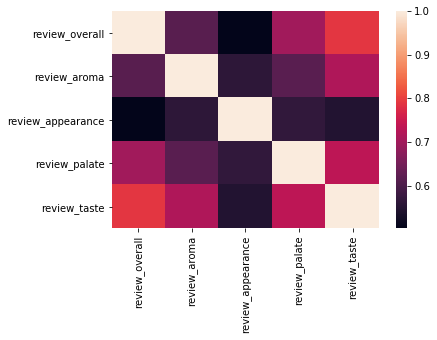

In [32]:
import seaborn as sns
corr = reviews.corr()
corrHeat = sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values)
fig = corrHeat.get_figure()
fig.savefig(r'C:\Users\ACrist\Documents\tryout\corrHeat.png')

In [34]:
# Question 4
# If one were to insist that aroma and appearance were the most important qualities of their beer,
# a recommendation could be given irrespective of the variables review_overall, review_taste, or
# review_palate. 
# The two dataframes below order the highest scoring beer_style calculated by taking the mean
# of review_aroma and review_appearance respectively. One could make a decision based on these
# dataframes alone if one had a prefence more toward either aroma or appearance, but if both
# variables are equally preferable, a better way would be to take an average of the two variables.

# As the last graph and dataframe show, if one liked beer primarily due to aroma and appearance equally,
# I would recommend a: American Double / Imperial Stout.

In [181]:
# Ordered by aroma
reviews = d[['review_aroma', 'review_appearance', 'beer_style']]
reviews.groupby('beer_style')[['review_aroma', 'review_appearance']].mean().sort_values(by='review_aroma', ascending=False)

,review_aroma,review_appearance
beer_style,,
American Double / Imperial Stout,4.160665,4.163633
Eisbock,4.156778,3.964514
Quadrupel (Quad),4.132533,4.117964
American Wild Ale,4.126756,4.005451
Lambic - Unblended,4.118043,3.912478
Gueuze,4.117574,4.034864
American Double / Imperial IPA,4.097782,4.078916
Russian Imperial Stout,4.076576,4.210072
Weizenbock,4.044677,4.009297


In [36]:
# Ordered by appearance
reviews.groupby('beer_style')[['review_aroma', 'review_appearance']].mean().sort_values(by='review_appearance', ascending=False)

,review_aroma,review_appearance
beer_style,,
Russian Imperial Stout,4.076576,4.210072
American Double / Imperial Stout,4.160665,4.163633
Quadrupel (Quad),4.132533,4.117964
American Black Ale,3.930456,4.112922
American Double / Imperial IPA,4.097782,4.078916
Belgian IPA,3.979753,4.075214
Bière de Champagne / Bière Brut,3.734704,4.045889
Baltic Porter,3.946379,4.039535
Foreign / Export Stout,3.828366,4.039015


In [221]:
average = reviews.groupby('beer_style').agg({'review_aroma': 'mean', 'review_appearance': 'mean'})
average['mean'] = average.mean(axis=1)

In [222]:
top10 = average.nlargest(10, 'mean')

In [223]:
top10.reset_index(inplace=True)

In [224]:
# Ordered by mean
top10.sort_values('mean', ascending=False)

,beer_style,review_aroma,review_appearance,mean
0,American Double / Imperial Stout,4.160665,4.163633,4.162149
1,Russian Imperial Stout,4.076576,4.210072,4.143324
2,Quadrupel (Quad),4.132533,4.117964,4.125249
3,American Double / Imperial IPA,4.097782,4.078916,4.088349
4,Gueuze,4.117574,4.034864,4.076219
5,American Wild Ale,4.126756,4.005451,4.066104
6,Eisbock,4.156778,3.964514,4.060646
7,American Barleywine,4.019343,4.036535,4.027939
8,Belgian IPA,3.979753,4.075214,4.027484
9,Weizenbock,4.044677,4.009297,4.026987


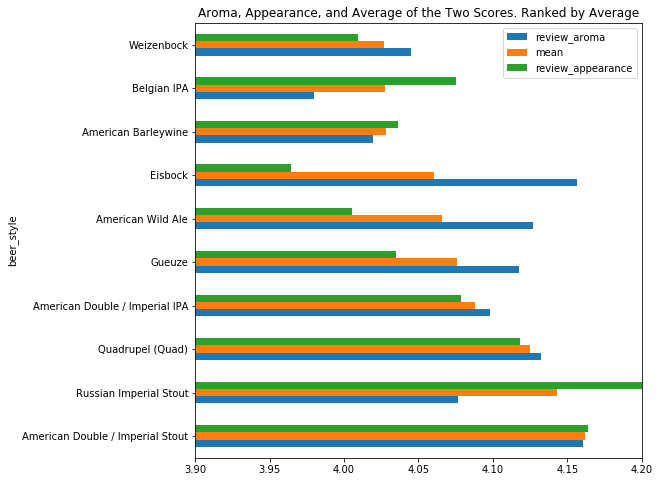

In [225]:
# A graph, ordered by mean, illustrating both aroma and appearance.
top10.plot(x='beer_style', y=['review_aroma', 'mean', 'review_appearance'], kind='barh',figsize=(8, 8), xlim=[3.9, 4.2], title='Aroma, Appearance, and Average of the Two Scores. Ranked by Average')